# Telco is a synthetic dataset created by IBM for a theoretical home telecommunications company. Our dataset holds 7048 customer Telco customer records. There are 21 columns for 21 variables. 20 columns are explanatory and one variable, churn, is the target variable.

This is a link to the dataset we found on Kaggle:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

# Load Dataset In

In [134]:
import pandas as pd
import numpy as np

churn_df = pd.read_csv("TelcoChurn.csv")
churn_df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Research Question

**What is the best model (Logistic, SVM, or RandomForestClassifier) at predicting customer churn with the following variables: Payment Method, Senior Citizen, and the dollar value of Monthly Charges?**

Method Selection:
The churn variable only has two types of possible values: yes or no. So we can use classification algorithms that work on binary classification problems.

## Variable Overview
We plan to use these three charges because I believe these are the best features that can possibly explain churn:

-**Payment Method**: If people pay electronically they may forget about their payments. It is also psychologically easier to pay electronically versus on mail

-**Senior Citizen**: Age is also a good explainer. Once someone is a senior citizen they may be on a fixed income and more likely to cut services.

-**Monthly Charges**: We theorize that people who pay more may be more likely to cancel their service

# Expectations & Evalution Measure
We expect logistic regression to perform better than the SVM and RandomForestClassifier approaches because our data has low dimensionality.

There are two ways we would evaluate our model's performance:

-*Accuracy*

-*AUC*

Accuracy is a good general measure to see how good a model is. However AUC is a better measure for classification because it performs better with imbalanced data (which is real world), ranking focus, and threshold independence.

# Select Variables, Clean Data, Scale Numerical Data, Training/Test Splits

To prepare our data we must create a new dataframe with the targeted variables.

Then we must map the categorical data. We will use hot encoding to solve this problem

Finally, we will apply StandardScaler on our monthly charges because we do not want the higher monthly charges dominating the distance calculations for our models

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#Find types of Monthly Charges

PaymentMethods = churn_df['PaymentMethod'].unique()
#print(PaymentMethods)

ChurnMethods = churn_df['Churn'].unique()
#print(ChurnMethods)

payment_mapping = {
    'Electronic check' : 0,
    'Mailed check' : 1,
    'Bank transfer (automatic)': 2,
    'Credit card (automatic)': 3
}

churn_mapping ={
    'Yes': 1,
    'No': 0
}

churn_df['PaymentMethodType'] = churn_df['PaymentMethod'].map(payment_mapping)
churn_df['ChurnMethodType']= churn_df['Churn'].map(churn_mapping)
filtered_churn_df = churn_df[['PaymentMethodType','SeniorCitizen','MonthlyCharges','ChurnMethodType']]

#Pick 2000 Random Samples
sampled_churn_df = filtered_churn_df.sample(n=2000,random_state = 420)

X = sampled_churn_df[['PaymentMethodType','SeniorCitizen','MonthlyCharges']]
y = sampled_churn_df['ChurnMethodType']

#Transform the Monthly Charges
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), ['MonthlyCharges'])
    ],
    remainder='passthrough'  # Leave the remaining columns ('gender' and 'race') unchanged
)
transformed_monthly_charges =  preprocessor.fit_transform(X)
X = pd.DataFrame(transformed_monthly_charges, columns=['PaymentMethodType','SeniorCitizen','MonthlyCharges'])

#Split the Training Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## SVM & Classification Report
We now train and analyze the efficacy of our SVM model. We have a pretty good accuracy score at .76

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
model = svm.SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       302
           1       0.52      0.13      0.21        98

    accuracy                           0.76       400
   macro avg       0.65      0.55      0.53       400
weighted avg       0.71      0.76      0.70       400



## Run Different SVM Kernels to Identify the Best Fit
Although we have information on how our SVM model performs, there is room to improve. We must run different kernels to identify the best kernel at classifiying if a customer will leave Telco. It looks like the best model at predicting Telco churn is the RBF methodology.

In [ ]:
# Add your code Here!
array2d = []
#Linear
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred_linear = model.predict(X_test)

print("Linear Accuracy Score:", accuracy_score(y_test, y_pred_linear))
array2d.append(['Linear',accuracy_score(y_test, y_pred_linear)])
#Poly
model = svm.SVC(kernel='poly')
model.fit(X_train, y_train)

y_pred_poly = model.predict(X_test)

print("Poly Accuracy Score:", accuracy_score(y_test, y_pred_poly))
array2d.append(['Poly',accuracy_score(y_test, y_pred_poly)])

#Sigmoid
model = svm.SVC(kernel='sigmoid')
model.fit(X_train, y_train)

y_pred_sigmoid = model.predict(X_test)

print("Sigmoid Accuracy Score:", accuracy_score(y_test, y_pred_sigmoid))
array2d.append(['Sigmoid',accuracy_score(y_test, y_pred_sigmoid)])

#RBF
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)

y_pred_rbf = model.predict(X_test)
array2d.append(['RBF',accuracy_score(y_test, y_pred_rbf)])

array2d.sort(key=lambda x: x[1],reverse = True)

print("RBF Accuracy Score:", accuracy_score(y_test, y_pred_rbf))
print()
print('The ' + array2d[0][0] + ' methodology is the most effective. It has the highest accuracy score')

Linear Accuracy Score: 0.755
Poly Accuracy Score: 0.755
Sigmoid Accuracy Score: 0.6475
RBF Accuracy Score: 0.7575

The RBF methodology is the most effective. It has the highest accuracy score


## Visualize ROC Curve
The ROC curve is used to showcase the perfomance of our model. It looks like our SVM model running the RBF methodology does well at outperforming a random guess

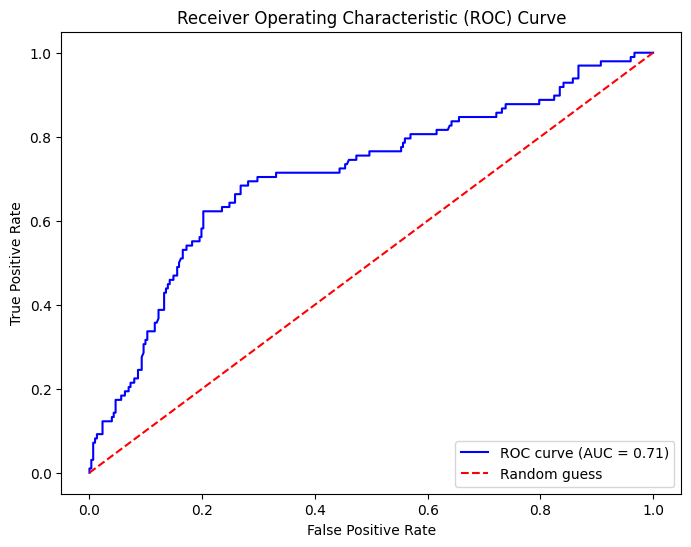

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
#ROC Curve
model = svm.SVC(kernel='rbf',probability=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute the FPR, TPR, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Logistic vs. SVM Model vs. RandomForestClassifier Analysis
Finally we must see if a Logistic Model or SVM model performs better. According to the accuracy from our classification reports, it looks like Logistic Regression performs better than SVM at classifying churn. We also ran different number of estimators in our RandomForestClassifier

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred_logistic,digits=6)

print("Logistic Classification Report:")
print(classification_rep)

model = svm.SVC(kernel = 'rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print("SVM Classification Report:")
print(classification_report(y_test,y_pred,digits=6))

from sklearn.ensemble import RandomForestClassifier
RFCmodel = RandomForestClassifier(n_estimators=200)
RFCmodel.fit(X_train, y_train)
predictions = RFCmodel.predict(X_test)
print("RandomForestClassifierClassification Report 200 Estimators:")
print(classification_report(y_test,predictions,digits=6))


RFCmodel = RandomForestClassifier(n_estimators=100)
RFCmodel.fit(X_train, y_train)
predictions = RFCmodel.predict(X_test)
print("RandomForestClassifierClassification Report 100 Estimators:")
print(classification_report(y_test,predictions,digits=6))



Logistic Classification Report:
              precision    recall  f1-score   support

           0   0.776000  0.963576  0.859675       302
           1   0.560000  0.142857  0.227642        98

    accuracy                       0.762500       400
   macro avg   0.668000  0.553217  0.543659       400
weighted avg   0.723080  0.762500  0.704827       400

SVM Classification Report:
              precision    recall  f1-score   support

           0   0.773333  0.960265  0.856721       302
           1   0.520000  0.132653  0.211382        98

    accuracy                       0.757500       400
   macro avg   0.646667  0.546459  0.534051       400
weighted avg   0.711267  0.757500  0.698613       400

RandomForestClassifierClassification Report 200 Estimators:
              precision    recall  f1-score   support

           0   0.802048  0.778146  0.789916       302
           1   0.373832  0.408163  0.390244        98

    accuracy                       0.687500       400
   macro 

# Visualize ROC Curve for Comparison
We ran ROC curves on each regression to fully check and visualize the performance difference between the methodologies. We ended up concluding that logistic regression performs better as it has an AUC of. 75, while the SVM has an AUC of .71, finally the RandomForestClassifier model has an AUC of .65

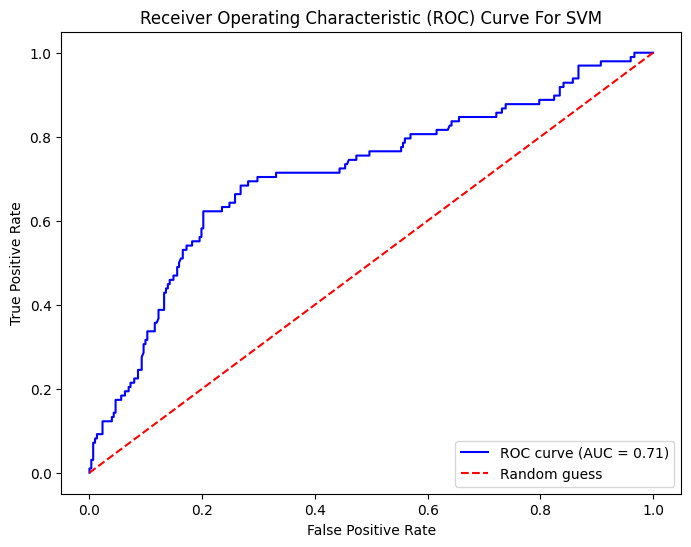

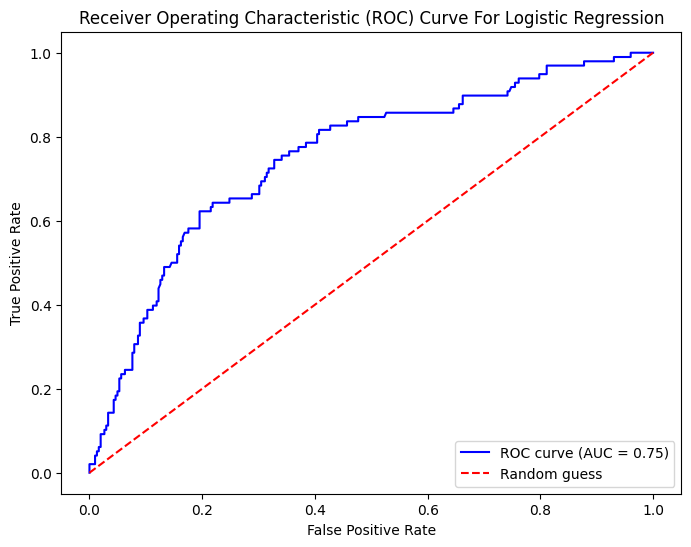

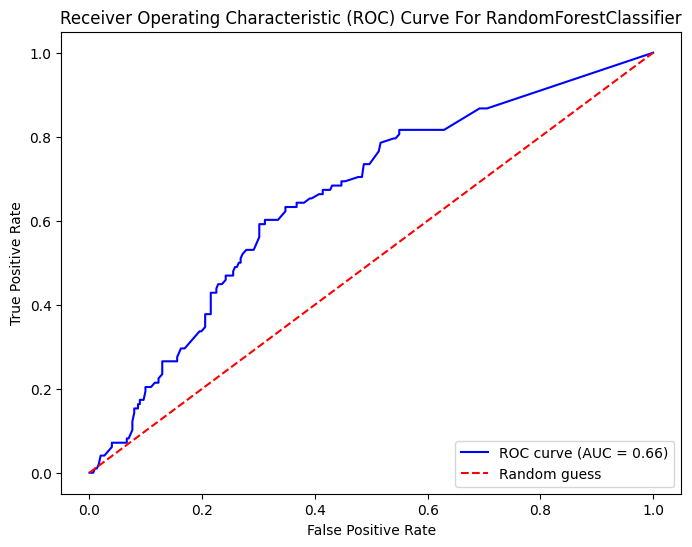

In [ ]:
#ROC Curve 1
model = svm.SVC(kernel='rbf',probability=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute the FPR, TPR, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For SVM')
plt.legend(loc='lower right')
plt.show()

##ROC Curve Logistic Model
y_pred = logistic_model.predict(X_test)

y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute the FPR, TPR, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For Logistic Regression')
plt.legend(loc='lower right')
plt.show()

##RandomForestClassifier Model
y_pred = RFCmodel.predict(X_test)

y_pred_prob = RFCmodel.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute the FPR, TPR, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()


# Conclusion

Logistic regression outpeformed our optimized SVM approach and a RandomForestClassifier Approach. We used accuracy and ROC curves to analyze the efficacy of the models and logistic regression came out on top.


# Future MLP Work

Accuracy: 0.7625
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       302
           1       0.56      0.14      0.23        98

    accuracy                           0.76       400
   macro avg       0.67      0.55      0.54       400
weighted avg       0.72      0.76      0.70       400



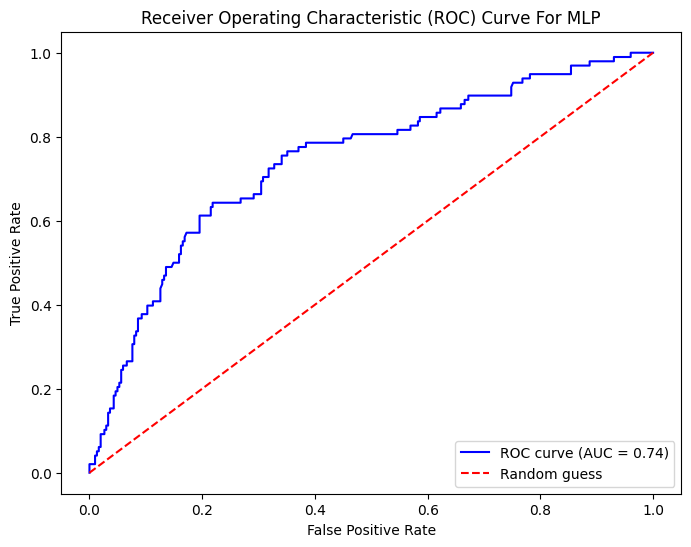

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(200,50),
                    max_iter=100, activation = 'tanh',solver='adam',
                    early_stopping=True, validation_fraction=0.25,
                    random_state=123)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

y_pred = clf.predict(X_test)

y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute the FPR, TPR, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For MLP')
plt.legend(loc='lower right')
plt.show()